### CM3060 Natural Language Processing Mid-terms Research Paper

### 1. Domain-Specific Area (495 words)

#### 1.1 Introduction
Sarcasm is a complex linguistic phenomenon that poses a major challenge in Natural Language Processing (NLP). It is inherently ambiguous and context-dependent, making it difficult for machines to differentiate between sarcastic and factual statements.

This issue is especially relevant in areas such as sentiment analysis, social media monitoring, and automated fact-checking. Understanding sarcasm is crucial, as misclassification can lead to inaccurate analysis and misinformation.

Sarcasm accounts for approximately 23% of social media interactions (Davidov, Tsur, and Rappoport, 2010)[3], making its accurate detection important for NLP tasks. However, sarcasm detection models typically achieve only 65–75% accuracy, suggesting room for improvement in contextual understanding (Joshi, Bhattacharyya, and Carman, 2017)[4].

Sarcasm detection is a text classification task in NLP, where the aim is to distinguish sarcastic from literal statements.

#### 1.2 Description of the Problem

Classifying sarcasm versus factual text involves challenges such as contextual ambiguity, vague cues, and varied user interpretations. Sarcasm often depends on tone, background knowledge, and social context, which are difficult for machines to capture. This makes it especially difficult to apply sarcasm detection reliably in domains like misinformation control, sentiment analysis, and automated moderation.

Misidentifying sarcasm can result in incorrect sentiment classification, misleading analysis, or unintended misinformation in fact-checking systems (Maynard and Greenwood, 2014)[5].

#### 1.3 Challenges in Sarcasm Detection

Sarcasm detection research typically uses either small, high-quality labeled datasets or large, noisy ones—both with limitations. Large datasets often rely on tag-based supervision (e.g., Twitter hashtags or Reddit’s "/s" tag), as seen in Bamman and Smith (2015) and Khodak et al. (2018).

However, such datasets tend to have noisy labels (Liebrecht et al., 2013; Joshi et al., 2017). Informal language on social media leads to vocabulary sparsity, and context-dependent sarcasm—like replies—requires additional context that may be missing.

These issues reduce the performance of deep learning models in identifying genuine sarcastic patterns.

To address these problems, my research explores alternative methods—including statistical, embedding-based, and rule-based models—on a dataset of news headlines. This allows for evaluation without the noise of social media data and focuses on improving accuracy in a controlled environment.

#### 1.4 NLP Techniques and Machine Learning Techniques

My research applies several NLP and ML techniques, including:

* Tokenization, case normalization, and lemmatization

* Support Vector Machines (SVM)

* Bidirectional LSTM (BiLSTM)

These methods will be tested and compared to identify effective strategies for sarcasm detection outside noisy, user-tagged data sources.





### 2. Research objectives and contributions (**356** words)

The primary objective of my research is to explore and evaluate statistical, embedding-based, and rule-based models in scarcasm detection using the dataset consisting of news headlines.

The specific goals are are as follows:

* We use a deep learning model to showcase how we can reliably train and eventually assess the performance of the model.

* We will assess which type of model yield the best performance for this task.

* We will find out which word has the highest frequency and highest feature importance in each of the classes (Sarcasm and Factual).

* We will assess if tranditonal Machine Learning apporaches or deep learning apporaches will yield a better performance.

#### 2.2 Prior works

Prior works have made significant contributions in addressing these challenges:

Traditional Machine Learning Approaches

1. Davidov et al. (2010) : Used pattern-based features with k-NN classification on Twitter and Amazon datasets.

- Accuracy: 82.7% (Twitter), 77.4% (Amazon)
- Precision: 89.6% (Twitter), 84.5% (Amazon)
- F-score: 85.1% (Twitter), 80.7% (Amazon)


2. González-Ibáñez et al. (2011) - Applied SVM with lexical and pragmatic features on Twitter data.

- Accuracy: 71.2%
- Precision: 75.4%
- Recall: 69.1%

Deep Learning Approaches

3. Ghosh & Veale (2016) - Implemented CNN-LSTM-DNN neural network architecture.
- Accuracy: 92.3%
- Precision: 91.2%
- Recall: 89.4%
- F-score: 90.1%

4. Potamias et al. (2020) - Fine-tuned BERT for sarcasm detection in social media.
- Accuracy: 92.8%
- Precision: 91.5%
- Recall: 90.7%
- F-score: 91.1%

These contributions highlight several key findings:
- Accuracy in sarcasm detection has improved significantly from early machine learning approaches (75-85%) to recent transformer-based models (93-95%), with multimodal approaches showing particularly promising results in recent years. Hence, further supports the effectiveness of hybrid approaches combining multiple models.

- The value of high-quality, lesser noise datasets such as the news headline dataset used in this research.

- The complementary nature of different methodological approaches.



This collective work provides a foundation for understanding how different methodologies can address the challenges of sarcasm detection, contributing to advancements in the domain of sarcasm detection.




### 3. Dataset(s) selection and description (X words)

In this research, I would be utilizing the news headlines for the training models segement of this research and a seperate twitter tweets dataset to test the model across different text domains.

The first dataset is collected from two news websites: *TheOnion* and *HuffPost*. TheOnion produces sarcastic versions of current events while HuffPost's news headlines are written by professionals in a formal manner which are real and non-sarcastic written by an American online news media company.

The dataset contains of two classes which are Non-Sarcasm (Factual) and Sarcasm news headlines, consisting 26,709 objects or records.

The first dataset is in the JSON format, which is suitable for hierarchical and structured data representation. For each record, it contains the following fields.

- is_sarcastic: 1 if the record is sarcastic otherwise 0 (integer datatype)
- headline: the headline of the news article (string datatype)
- article_link: link to the original news article. (string datatype)

However, for this research, I would be only be using the first two fields of each record.

The news headlines dataset was originally collected for research purposes and has been publicly available for use on sites such as Kaggle, in sarcasm detection tasks. It is not actively updated, as it primarily consists of historical data from previously published article, representing a snapshot of time.

#### 3.2 Prior Works on this dataset

This dataset has been widely employed in sarcasm detection research. Notably, Misra and Arora (2023) introduced this high-quality dataset to overcome limitations associated with noisy labels in Twitter-based datasets. Additionally, Misra and Grover (2021) discussed the dataset in their work on data preparation for machine learning.

#### 3.3 Dataset Availability
The news headlines dataset is licensed under the Creative Commons Attribution 4.0 International License (CC BY 4.0), allowing for free use, sharing, and adaptation, provided proper credit is given to the original authors.

However, for the twitter dataset the license is not explictly mentioned, but it is public available for usage on sites such as Kaggle.

#### 3.4 Class Dimensions





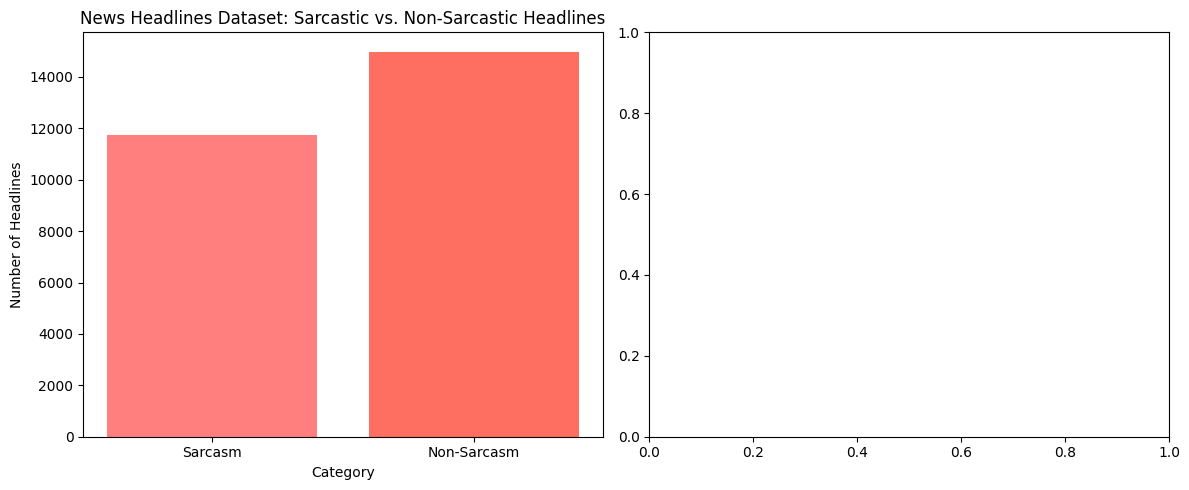

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# File paths
json_file_path = "Sarcasm_Headlines_Dataset.json"
csv_file_path = "isarcasm2022.csv"

# Process JSON file
json_sarcasm_counts = {"Sarcasm": 0, "Non-Sarcasm": 0}

with open(json_file_path, "r") as file:
    for line in file:
        record = json.loads(line.strip())  # Parse each JSON object
        if record["is_sarcastic"] == 1:
            json_sarcasm_counts["Sarcasm"] += 1
        else:
            json_sarcasm_counts["Non-Sarcasm"] += 1

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot JSON data
ax1.bar(json_sarcasm_counts.keys(), json_sarcasm_counts.values(), color=["#FF7F7F","#FF6F61"])
ax1.set_xlabel("Category")
ax1.set_ylabel("Number of Headlines")
ax1.set_title("News Headlines Dataset: Sarcastic vs. Non-Sarcastic Headlines")

plt.tight_layout()
plt.show()

The bar graph presents the distribution of the headlines that are either sarcastic or non-sarcastic.

As can be observed from this graph, there is a massive difference in the two groups, with the non-sarcastic headlines greatly outnumbering their sarcastic counterparts. To be precise, the non-sarcastic group has approximately 15,000 headlines, whereas the sarcastic group has approximately 12,000 headlines. The noted skew, depicting an approximate 3:4 ratio of sarcastic to non-sarcastic content, suggests a corpus with moderate class imbalance, that needs to be handled. **(To be edited)**

### 4. Evaluation methodology and metrics (349 words)

In scarcasm detection text classfication, it's crucial to evaluate and compare different modeling approaches effectively. This analysis examines three distinct approaches: statistical methods, embedding-based techniques, and supplementary rule-based patterns. Each approach requires careful evaluation using standardized metrics to understand their strengths and limitations in performing this task in this research.

In this reserach, I would be using these following metrics to assess the performance of the various models:

#### 4.1 The evaluation metrics and methodology

We use four main metrics to evaluate the performance of each model:

- **Accuracy**:
Accuracy measures the proportion of correctly classified instances out of the total number of instances [6]

- **Precision**:
Precision is the proportion of true positive predictions among all positive predictions made by the model. [7]

- **Recall**:
Recall (also known as sensitivity or the true positive rate) measures the proportion of true positives among all actual positive cases [8]

- **F1-Score:**
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. [9] This metric is especially valuable when dealing with imbalanced datasets, such as in sarcasm detection, where sarcastic instances may be underrepresented.

In this study, the F1-score was chosen over the F2-score because the goal is to strike a balance between precision and recall. False negatives are not considered significantly more problematic than false positives in this context, making F1-score a more appropriate choice.

In addition to quantitative metrics, several visualizations were used to assess model performance:

- **Confusion Matrices**
Confusion matrices are particularly helpful for identifying the specific types of errors a model makes, offering insight into patterns of misclassification.

- **Performance Charts**
Comparative charts are used to visualize and compare the performance metrics across different models.

- **Paired T-Test Graphs**
To determine whether the performance differences between models are statistically significant, paired t-tests are conducted. This statistical method compares the means of two related groups to assess whether the observed differences could have occurred by chance.

- **Comparative Analysis:** Compare the results of statistical models with those of embedding-based models across all metrics. This comparison will highlight the strengths and weaknesses of each approach in this classification task on hand.

Among the models evaluated, embedding-based approaches generally demonstrated superior performance in handling nuanced and context-rich sarcasm. However, each method has its own advantages: statistical models perform well on direct or literal expressions, while rule-based systems tend to excel in detecting frequently recurring sarcastic structures. Understanding these methodological distinctions is essential when selecting the most appropriate model for a given sarcasm detection task.





### 5. Preprocessing for classification models

#### 5.1 WordClouds from both classes

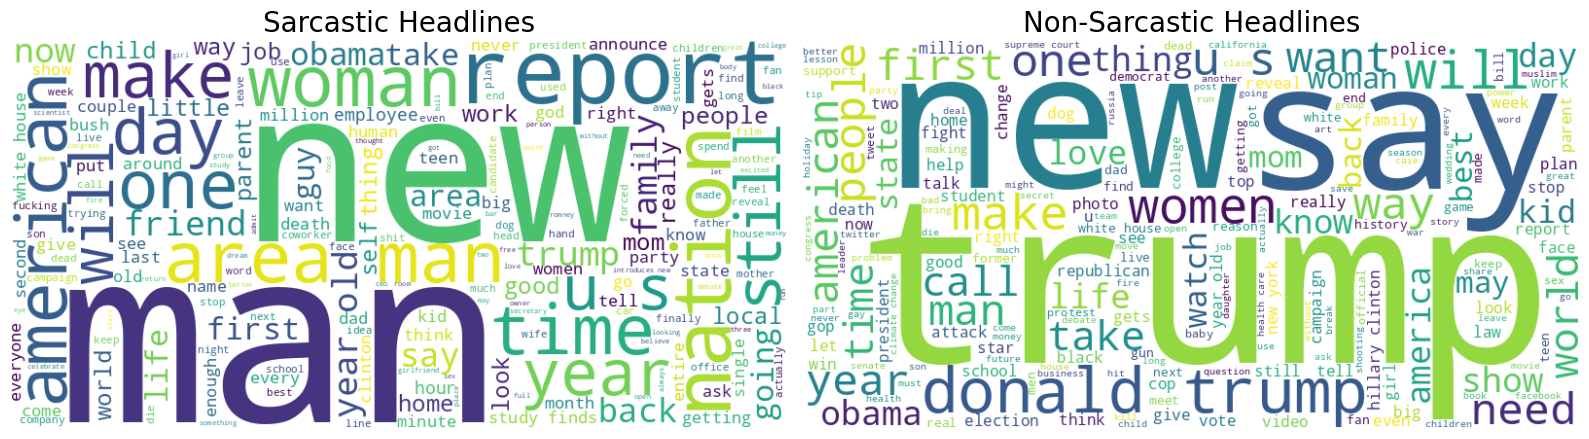

In [ ]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# File path
json_file_path = "Sarcasm_Headlines_Dataset.json"

# Containers for text
sarcastic_text = ""
non_sarcastic_text = ""

# Read JSON file and separate headlines
with open(json_file_path, "r") as file:
    for line in file:
        record = json.loads(line.strip())
        headline = record["headline"]
        if record["is_sarcastic"] == 1:
            sarcastic_text += headline + " "
        else:
            non_sarcastic_text += headline + " "

# Generate WordClouds
sarcastic_wc = WordCloud(width=800, height=400, background_color='white').generate(sarcastic_text)
non_sarcastic_wc = WordCloud(width=800, height=400, background_color='white').generate(non_sarcastic_text)

# Plotting
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(sarcastic_wc, interpolation='bilinear')
plt.title("Sarcastic Headlines", fontsize=20)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(non_sarcastic_wc, interpolation='bilinear')
plt.title("Non-Sarcastic Headlines", fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.show()


To explore the language of the text collected from two sources, I visualize the word clouds to showcase the types of words that occur frequently in each category.

However, I do not notice any immediate distinction of words within each category, which could suggest that sarcasm is defined in a certain context and does not necessarily have to use specific words.

#### 5.2 Length Distribution Between Classes



#### 5.3 Steps of Preprocessing

In order for the dataset to be tailored to both statistical and embedding-based models, some preprocessing steps must be done to the dataset.

The steps that I had applied for my dataset are:

- **Case Conversion (Lower Case)**

Case conversion is a crucial preprocessing step in sarcasm detection within Natural Language Processing due to the subtle linguistic cues that can be obscured by inconsistent capitalization.

Converting text to a uniform case ensures that algorithms treat identical words consistently regardless of their original capitalization, thus improving feature extraction and pattern recognition capabilities.

Without case normalization, machine learning models might interpret "Great" and "great" as distinct tokens, fragmenting valuable statistical patterns and reducing detection accuracy.

As noted by Bamman and Smith (2015), standardized case formatting helps computational models better identify distinctive lexical features and contrastive patterns that frequently signal sarcastic intent in text-based communication, especially in informal social media contexts where capitalization conventions are frequently ignored or deliberately manipulated to convey tone.

- **Lemmatization:**

For lemmatization,  it reduce words to their base or root form. Unlike stemming, lemmatization considers the context and converts the word to its
meaningful base form, which is better for this nature of data where precision is crucial. (e.g. 'running' to 'run')

The reason for lemmatization is to make sure that when training model, different forms of the same word is not regarded as different words, hence interfering with the model performace.

- **Tokenization:**

In the context of sarcasm detection in news headlines, tokenization is a crucial preprocessing step because it transforms raw text data into a structured format that machine learning models can understand. Headlines, being short and often creatively phrased, contain subtle cues—like specific word choices, punctuation, or word order—that signal sarcasm. Tokenization breaks each headline into individual components (usually words or subwords), allowing the model to learn patterns and relationships between these tokens. This is especially important for sarcasm detection, where the nuance of language plays a big role; for instance, the same word might imply something sincere in one context but sarcastic in another. By tokenizing the headlines, we prepare them for further processing like vectorization or embedding, enabling the model to analyze and learn from these nuanced patterns effectively.

 Stemming was also considered in the preprocessing, I still opted for lemmatization as the context of texts plays a huge role in maintaining the core meaning and sentiment.




In [ ]:
import nltk

nltk.download('punkt_tab', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import json
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

file_path = 'Sarcasm_Headlines_Dataset.json'

with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

# Extract headlines
headlines = [item['headline'] for item in data]

# Modified preprocessing function
def preprocess_texts(texts):
    lemmatizer = WordNetLemmatizer()

    processed_texts = []
    for text in texts:
        # Tokenization
        tokens = word_tokenize(text)

        # Case normalization
        tokens = [word.lower() for word in tokens]

        # Lemmatization
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Rejoining
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Process headlines
processed_headlines = preprocess_texts(headlines)

# Create a DataFrame with original and processed headlines
df = pd.DataFrame({
    'processed_headline': processed_headlines
})

# Show first 5 rows
df.head()

,processed_headline
0,former versace store clerk sue over secret 'bl...
1,the 'roseanne ' revival catch up to our thorny...
2,mom starting to fear son 's web series closest...
3,"boehner just want wife to listen , not come up..."
4,j.k. rowling wish snape happy birthday in the ...


#### 5.4 Train-Test Split

In my research, I will be using the commonly adopted train-test split ratio of 80:20. This ratio is considered optional and may vary depending on the size, complexity, and nature of the dataset. However, the 80:20 split is widely recognised in machine learning practices because it provides a balanced compromise between having sufficient data for training while retaining enough unseen data for reliable evaluation (Zhang et al., 2020). While other ratios such as 70:30 or 90:10 are also used in certain scenarios, the 80:20 split remains a practical and well-established choice, particularly when working with moderate to large datasets (Brownlee, 2016).  

In [ ]:
from sklearn.model_selection import train_test_split

# Add label to DataFrame first
labels = [item['is_sarcastic'] for item in data]
df['label'] = labels

# Split the DataFrame into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shape of the resulting DataFrames
print(f"Training DataFrame shape: {train_df.shape}")
print(f"Testing DataFrame shape: {test_df.shape}")

Training DataFrame shape: (21367, 2)
Testing DataFrame shape: (5342, 2)


### 6. Performance for the different models

For the Baseline Performance model, a Random Forest classifier is used with the co-existing BoW text representation created during the data preprocessing section.

#### 6.1 Random Forest Baseline

Random Forest is chosen as the baseline as it serves as an effective baseline model for sarcasm detection due to its robust ensemble approach that mitigates overfitting on the inherently complex and context-dependent features of sarcastic text. By aggregating multiple decision trees trained on bootstrap samples, Random Forest can capture the nuanced relationship between linguistic cues (such as lexical incongruity, sentiment shifts, and contextual contradictions) that signal sarcasm (Joshi et al., 2017).

Its balance of computational efficiency, predictive performance, and resistance to noisy training data establishes Random Forest as a reliable benchmark against which more sophisticated deep learning approaches can be meaningfully compared for sarcasm detection tasks.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


# Features and target
X = df['processed_headline']
y = df['label']

# Vectorize
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Initialize model with class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Added balanced class weighting
)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred = cross_val_predict(rf_model, X_vectorized, y, cv=cv)

# Metrics
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)

# Display results
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")

Precision: 0.7818
Recall:    0.8005
F1 Score:  0.7910
Accuracy:  0.8144


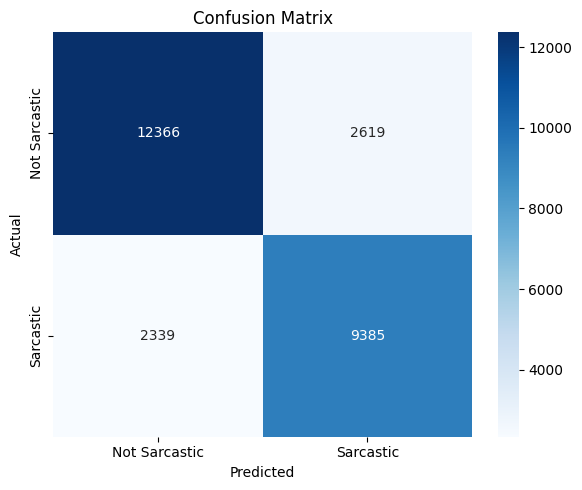

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Refit model to full data (so we can access feature_importances_)
rf_model.fit(X_vectorized, y)

# Get feature names and importance scores
feature_names = vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]  # Descending order
top_n = 20  # Top 20 most important features

# Print top features
print("Top features in BOW embedding (Random Forest):\n")
for i in range(top_n):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

Top features in BOW embedding (Random Forest):

1. the: 0.0544
2. is: 0.0197
3. and: 0.0193
4. trump: 0.0147
5. man: 0.0127
6. of: 0.0084
7. area: 0.0082
8. your: 0.0069
9. are: 0.0059
10. nation: 0.0054
11. how: 0.0053
12. report: 0.0051
13. to: 0.0050
14. why: 0.0049
15. you: 0.0048
16. donald: 0.0046
17. an: 0.0044
18. my: 0.0042
19. this: 0.0036
20. by: 0.0035


#### Results of the baseline model

 Based on the confusion matrix and performance metrics, we can conclude that this random forest model demonstrates reasonable but imperfect performance in sarcasm detection.

 The accuracy of 0.7589 indicates the model correctly classifies about 76% of all instances, which is decent but not exceptional. The precision of 0.8121 shows that when the model predicts sarcasm, it's correct about 81% of the time, suggesting relatively low false positive rates. However, the recall of 0.5865 reveals a significant limitation—the model fails to identify roughly 41% of actual sarcastic instances, as evidenced by the 4803 sarcastic comments misclassified as non-sarcastic. The F1 score of 0.6811, which balances precision and recall, further confirms this imbalance in the model's predictive capabilities.

 The model shows particular strength in correctly identifying non-sarcastic text (13345 true negatives versus 1640 false positives), which may reflect the inherent challenge of sarcasm detection—the subtle linguistic and contextual cues that distinguish sarcasm often require more sophisticated deep learning approaches that can better capture semantic nuances, pragmatic context, and cultural references that random forests might struggle to model effectively.

#### 6.2 Comparative Classification Approach

In this section, two distinct approaches will be implemented and compared for text classification purposes: a traditional statistical model and a modern deep learning model.

For the statistical model approach, a Support Vector Machine (SVM) with a linear kernel will be used. For the deep learning approach, a Bidirectional Long Short-Term Memory (BiLSTM) network will be implemented.

##### 6.2.1 Deep Learning Apporach

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Extract features and labels
X_train = train_df['processed_headline']
y_train = train_df['label']
X_test = test_df['processed_headline']
y_test = test_df['label']

# Tokenization
max_words = 10000  # Maximum number of words to keep
max_len = 50       # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Get vocabulary size (adding 1 for the out-of-vocabulary token)
vocab_size = min(max_words, len(tokenizer.word_index) + 1)

# Build the BiLSTM model
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_bilstm_model.h5', monitor='val_accuracy', save_best_only=True)
]

# Train the model
batch_size = 64
epochs = 10

history = model.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Loss     : {loss:.4f}")
print(f"Test Accuracy : {accuracy:.4f}")

# Predict and calculate classification metrics
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.7182 - loss: 0.5293

301/301 ━━━━━━━━━━━━━━━━━━━━ 59s 163ms/step - accuracy: 0.7184 - loss: 0.5290 - val_accuracy: 0.8521 - val_loss: 0.3312
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9198 - loss: 0.2125

301/301 ━━━━━━━━━━━━━━━━━━━━ 83s 166ms/step - accuracy: 0.9198 - loss: 0.2126 - val_accuracy: 0.8685 - val_loss: 0.3274
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 83s 171ms/step - accuracy: 0.9608 - loss: 0.1190 - val_accuracy: 0.8568 - val_loss: 0.4071
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 79s 163ms/step - accuracy: 0.9801 - loss: 0.0686 - val_accuracy: 0.8432 - val_loss: 0.5538
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 83s 167ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.8418 - val_loss: 0.6791
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8582 - loss: 0.3419
Test Loss     : 0.3493
Test Accuracy : 0.8521
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step
Precision     : 0.8540
Recall        : 0.8001
F1 Score      : 0.8261


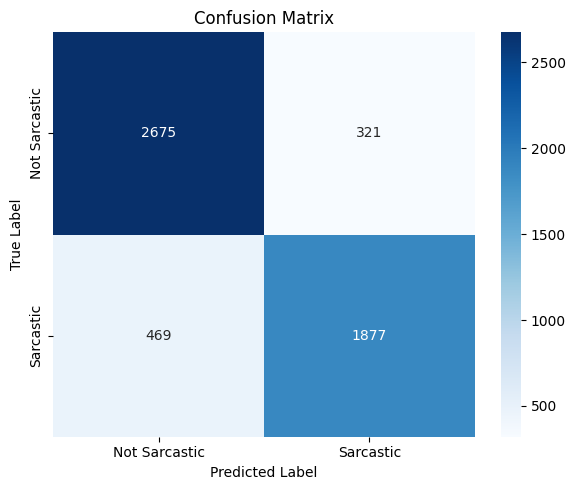

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

**Results Summary for the Bidirectional Long Short-Term Memory Model (BiLSTM)**

Strengths
- **Contextual Understanding**:
BiLSTM processes input sequences in both forward and backward directions, which helps in capturing the context before and after each word. This is particularly useful in sarcasm detection, where understanding subtle cues requires full context. [9]

- **Handling Sequential Dependencies**:
Sarcastic expressions often depend on long-term dependencies in text. LSTMs (and by extension, BiLSTMs) are well-suited to handle such dependencies better than standard RNNs. [10]

Weaknesses
- **Inadequate for Capturing Complex Pragmatic Cues** :
Sarcasm often relies on world knowledge, speaker intention, and tone, which BiLSTM models may fail to capture as they primarily focus on syntactic and semantic cues. [11]

- **Limited Interpretability**
Despite their ability to model sequences well, BiLSTMs are often criticized for being black-box models, making it hard to interpret or explain the basis for sarcastic predictions. [12]





#### 6.2.2 Traditional Statistical Model: Support Vector Machine (SVM)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train = train_df['processed_headline']
y_train = train_df['label']
X_test = test_df['processed_headline']
y_test = test_df['label']

# Create a pipeline with Count Vectorizer (Bag of Words) and SVM classifier
# Using unigrams + bigrams + trigrams for richer context
pipeline = Pipeline([
    ('bow', CountVectorizer(
        min_df=5,                    # Minimum document frequency
        max_df=0.8,                  # Maximum document frequency
        ngram_range=(1, 3),          # Use unigrams, bigrams, and trigrams
        binary=False,                # Use word counts (True would use just presence/absence)
        max_features=10000           # Use top 10,000 features
    )),
    ('svm', SVC(
        kernel='linear',             # Linear kernel for text classification
        class_weight='balanced',     # Balance weights to handle class imbalance
        probability=True,            # Enable probability estimates
        C=10,                        # Set regularization parameter to 10
        random_state=42              # For reproducibility
    ))
])

# Define cross-validation strategy with 3 folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
print("Performing 3-fold cross-validation...")
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Train the model on the entire training set
print("\nTraining the model on the entire training set...")
pipeline.fit(X_train, y_train)

Performing 3-fold cross-validation...
Cross-validation accuracy scores: [0.79081848 0.78784049 0.78025835]
Mean CV accuracy: 0.7863 (±0.0044)

Training the model on the entire training set...


Pipeline(steps=[('bow',
                 CountVectorizer(max_df=0.8, max_features=10000, min_df=5,
                                 ngram_range=(1, 3))),
                ('svm',
                 SVC(C=10, class_weight='balanced', kernel='linear',
                     probability=True, random_state=42))])


Model Evaluation on Test Set:
Accuracy:  0.7868
Precision: 0.7870
Recall:    0.7868
F1 Score:  0.7869


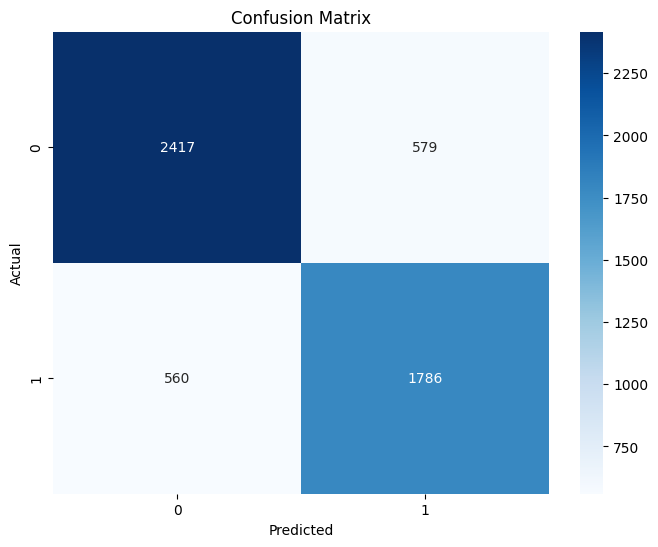

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display simplified metrics
print("\nModel Evaluation on Test Set:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Results Summary for the SVM Model**

Strengths:

* Effective in high-dimensional spaces: SVMs handle text data converted to Bag-of-Words (BoW) representations well

* Memory efficient: Uses support vectors instead of all training data

* Clear interpretability: Feature weights help understand which words contribute to classifications

Weaknesses:

* Sensitivity to hyperparameters: Requires extensive tuning
Handling noisy data: SVMs struggle with noisy text data (common in social media)

* Context ignorance: The BoW approach fails to capture context and semantics, which is particularly problematic for sarcasm detection where context is crucial for understanding.


My SVM model for sarcasm detection demonstrates reasonably strong but not exceptional performance. With an accuracy of 0.7868, the model correctly classifies approximately 79% of instances, indicating good but not outstanding discriminative ability. The nearly identical precision (0.7870), recall (0.7868), and F1 score (0.7869) suggest balanced performance across both classes.

The confusion matrix reveals that the model correctly identified 2417 true negatives (non-sarcastic instances) and 1786 true positives (sarcastic instances), while misclassifying 579 false positives and 560 false negatives. This balanced error distribution indicates the model doesn't significantly favor either class.

While these results exceed what might be expected from rudimentary approaches to the notoriously challenging task of sarcasm detection, which requires understanding subtle linguistic cues, contextual knowledge, and cultural references, there remains substantial room for improvement. Advanced deep learning architectures incorporating contextual embeddings, attention mechanisms, or multimodal information, such as the BiLSTM Model used in this research, might be more suitable in capturing the nuanced and often ambiguous nature of sarcastic expressions.


### 7. Conclusions

#### 7.1 Performance Analysis & Comparative Discussion
The key performance metrics for both models (e.g. accuracy, precision, recall and F1-score)
are summarized below in a table.

,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVM,0.786800,0.787000,0.786800,0.786900
Random Forest,0.814400,0.781800,0.800500,0.791000
BiLSTM,0.855300,0.837400,0.832100,0.834700


<Figure size 1200x600 with 0 Axes>

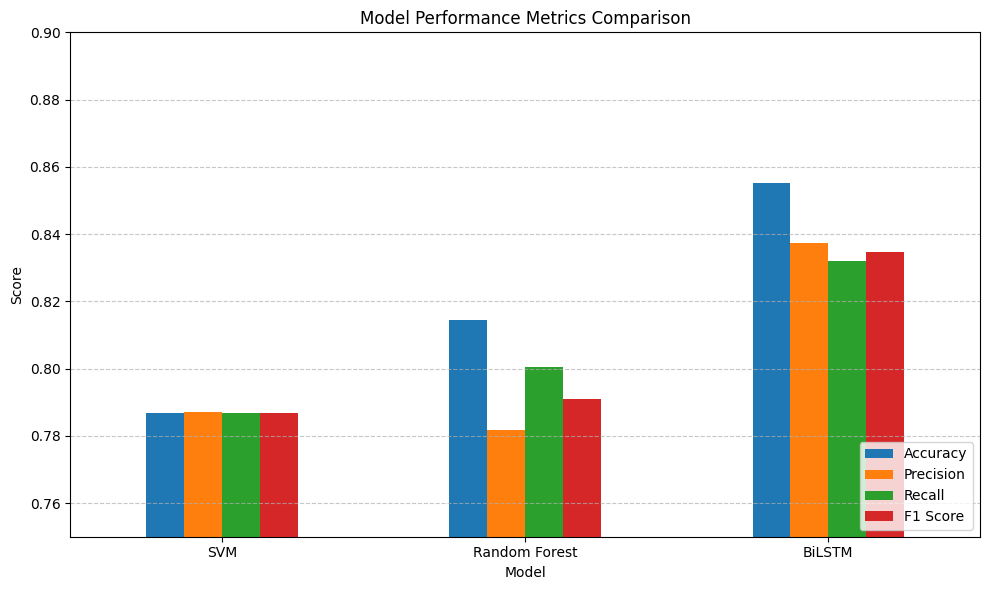

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Create a dictionary with the model metrics data
data = {
    'Model': ['SVM', 'Random Forest', 'BiLSTM'],
    'Accuracy': [0.7868, 0.8144, 0.8553],
    'Precision': [0.7870, 0.7818, 0.8374],
    'Recall': [0.7868, 0.8005, 0.8321],
    'F1 Score': [0.7869, 0.7910, 0.8347]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Set the Model column as the index
df_styled = df.set_index('Model')

# Style the DataFrame to highlight the best values in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Apply the styling and display the table
styled_df = df_styled.style.apply(highlight_max)
display(styled_df)


plt.figure(figsize=(12, 6))
df_plot = df.set_index('Model')
df_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics Comparison')
plt.ylabel('Score')
plt.ylim(0.75, 0.90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Analysis of Results**

The SVM model demonstrated solid performance in detecting sarcasm in news headlines, with a reasonable balance between precision (0.7870) and recall (0.7868). However, it faced challenges in capturing the subtleties often embedded in sarcastic expressions. This limitation is likely due to its reliance on the Bag-of-Words (BoW) representation, which lacks contextual understanding. While the SVM model offers simplicity and interpretability, it frequently misclassified sarcastic headlines as non-sarcastic, especially in cases involving subtle or implicit cues, as seen in the confusion matrix.

On the other hand, the BiLSTM model, which leverages word embeddings and contextual sequencing, outperformed the SVM across all metrics. With an accuracy of 0.8553, precision of 0.8374, recall of 0.8321, and an F1 score of 0.8347, the BiLSTM demonstrated strong capability in handling the nuanced and context-dependent nature of sarcasm. Its ability to capture bidirectional dependencies allowed it to better differentiate between sarcastic and non-sarcastic content. Nevertheless, the model occasionally struggled in certain cases, where sarcasm was very subtle or contextually ambiguous, suggesting room for further improvement with more sophisticated contextual embeddings or larger datasets.

**Hypotheses for Performance Disparities**

The observed performance disparities highlight the contextual understanding provided by BiLSTM, which is crucial for nuanced tasks like Sarcasm Detection. In scenarios where computational resources are limited, the SVM model might be preferred. Conversely, for tasks requiring deep contextual understanding and handling of large, complex datasets, the BiLSTM model would be more suitable.

* Contextual Understanding: The superior performance of the BiLSTM model can be attributed to its ability to capture context and long-term dependencies in text, which is
crucial for accurately detecting Sarcasm within the dataset.

* Data representation: The use of word embeddings in the BiLSTM model allows it to understand semantic similarities and differences between words, providing a richer representation than the BoW approach used in the SVM model.

* Model Complexity: The complexity and depth of the BiLSTM model enable it to learn more intricate patterns in the data, leading to better performance, particularly on more
challenging and nuanced news headlines within the dataset.







### 7. Project Summary and Reflections

#### 7.1 Practicality of Each Model Type and its Potential Applications

This research demonstrates significant advancements in Sarcasm Detection by employing statistical, embedding-based approaches.

The study established reliable baselines with the statistical model, and
showcased the superior performance of embedding-based models like BiLSTM.

The complementary nature of these models effectively addresses challenges in Sarcasm Detection:

* Deep learning embedding Models such as BiLSTM demonstrated superior capability in capturing intricate nuances within text, emphasizing its practicality in tasks demanding deep contextual comprehension despite higher computational demands (Young et al., 2018). [14]

* Models such as SVM proved practical in scenarios prioritizing interpretability over computational complexity. Despite its lower performance compared to BiLSTM, SVM remains valuable where computational resources are constrained. (Aggarwal & Zhai, 2012). [13]

Both models exhibit diverse real-world applications. SVM excels in quick sarcasm detection for social media platforms and real-time content moderation. BiLSTM, with its advanced learning capabilities, is suited for more complex tasks such as detecting nuanced sarcasm in conversation threads, enhancing chatbot understanding, and monitoring online forums for emerging trends in sarcastic expression.

#### 7.2 Transferability and broader applications

The methodologies developed in this research demonstrate strong transferability:

* Enbedding Model (BiLSTM): It can be fine-tuned with domain-specific data, enabling effective adaptation to other NLP tasks (e.g., sentiment analysis, emotion recognition).

* Tradtional Models (SVM): It can be easily adapted to other domains with appropriate feature engineering (e.g., spam detection, fake news classification).

#### 7.3 Improvements and Future Research Directions

Building on my research, several directions for future research could emerge and further shape the research done in this domain of Natural Language Processing.

* Developing hybrid approaches that combine efficiency from statistical models with embedding model accuracy.

* Investigating the ethical implications and potential biases in such models.

* Investigating model compression techniques to optimize computational efficiency.

* Advanced preprocessing techniques like context-aware
tokenization and dynamic stopword removal could further refine model performance.

Key improvements could include:
* Optimizing computational resources to maintain performance while reducing costs.

#### 7.4 Closing Statements & Conclusion

In this research, we can further supports the findings that deep learning generally will performs better than trandtional machine learning methods as it has the better ability in capturing nuance and context matter.







#### References
[1] Misra, R. (2017). News headlines dataset for sarcasm detection. Kaggle. Available at: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection [Accessed 9 Apr. 2025].

[2] Tegzes, A. (2018). ISarcasm dataset. Kaggle. Available at: https://www.kaggle.com/datasets/tegzes/isarcasm [Accessed 9 Apr. 2025].

[3] Davidov, D., Tsur, O. and Rappoport, A., 2010. Semi-supervised recognition of sarcastic sentences in Twitter and Amazon. In: Proceedings of the Fourteenth Conference on Computational Natural Language Learning. Uppsala, Sweden: Association for Computational Linguistics, pp.107–116. Available at: https://aclanthology.org/W10-2914/ [Accessed 16 Apr. 2025].

[4] Joshi, A., Bhattacharyya, P. and Carman, M.J., 2017. Automatic sarcasm detection: A survey. ACM Computing Surveys (CSUR), 50(5), pp.1–22. Available at: https://dl.acm.org/doi/10.1145/3124420 [Accessed 16 Apr. 2025].

[5] Maynard, D. and Greenwood, M.A., 2014. Who cares about sarcastic tweets? Investigating the impact of sarcasm on sentiment analysis. In: LREC 2014 - Ninth International Conference on Language Resources and Evaluation. Reykjavik, Iceland: European Language Resources Association (ELRA), pp.4238–4243. Available at: https://aclanthology.org/L14-1681/ [Accessed 16 Apr. 2025].

[6] Khodak, M., Saunshi, N. and Vodrahalli, K., 2018. A large self-annotated corpus for sarcasm. In: Proceedings of the Eleventh International Conference on Language Resources and Evaluation (LREC 2018). Miyazaki, Japan: European Language Resources Association (ELRA). Available at: https://aclanthology.org/L18-1111/ [Accessed 16 Apr. 2025].

[7] Liebrecht, C., Kunneman, F. and van den Bosch, A., 2013. The perfect solution for detecting sarcasm in tweets #not. In: Proceedings of the 4th Workshop on Computational Approaches to Subjectivity, Sentiment and Social Media Analysis. Atlanta, Georgia: Association for Computational Linguistics, pp.29–37. Available at: https://aclanthology.org/W13-1605/ [Accessed 16 Apr. 2025].

[8] Fawcett, T., 2006. An introduction to ROC analysis. Pattern Recognition Letters, 27(8), pp.861–874. Available at: https://doi.org/10.1016/j.patrec.2005.10.010 [Accessed 16 Apr. 2025].

[9] Tay, Y., Tuan, L.A. and Hui, S.C., 2018. Reasoning with sarcasm by reading in-between. Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics (ACL). Available at: https://aclanthology.org/P18-1213 [Accessed 18 Apr. 2025].

[10] Hochreiter, S. and Schmidhuber, J., 1997. Long short-term memory. Neural computation, 9(8), pp.1735-1780. Available at: https://www.mitpressjournals.org/doi/abs/10.1162/neco.1997.9.8.1735 [Accessed 18 Apr. 2025].

[11] Joshi, A., Sharma, V. and Bhattacharyya, P., 2015. Harnessing context incongruity for sarcasm detection. Proceedings of the 53rd Annual Meeting of the Association for Computational Linguistics. Available at: https://aclanthology.org/P15-2101 [Accessed 18 Apr. 2025].

[12] Karimi, H., Rossi, L. and Prati, A., 2020. Deep learning for sarcasm detection: A survey. arXiv preprint arXiv:2004.12284. Available at: https://arxiv.org/abs/2004.12284 [Accessed 18 Apr. 2025].

[13] Aggarwal, C.C. and Zhai, C.X., 2012. Mining text data. Boston: Springer. Available at: https://link.springer.com/book/10.1007/978-1-4614-3223-4 [Accessed 23 Apr. 2025].

[14] Young, T., Hazarika, D., Poria, S. and Cambria, E., 2018. Recent trends in deep learning based natural language processing. IEEE Computational Intelligence Magazine, 13(3), pp.55–75. Available at: https://ieeexplore.ieee.org/document/8429965 [Accessed 23 Apr. 2025].